In [1]:
#Importamos librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
from scipy import optimize
from scipy import fftpack


In [2]:
#Leemos el archivo de datos
df1 = pd.DataFrame( pd.read_csv("datos.csv", engine="python" ) )
df1.head()

,Tiempo (ms),Datos
0,0,"0,034280838414168"
1,1,"2,90381039467801"
2,2,"0,281685323815136"
3,3,"1,21357532348593"
4,4,"0,409638453564962"


In [3]:
df1.dtypes

Tiempo (ms)     int64
Datos          object
dtype: object

In [4]:
df1.tail()

,Tiempo (ms),Datos
251,251,"-2,16265407727144"
252,252,"-1,809241935771"
253,253,"2,07997391166884"
254,256,"1,00939369224201"
255,257,"-0,584841884233813"


In [5]:
Num=256

#Convertimos el tiempo a milisegundos
TIEMPO=[float(df1["Tiempo (ms)"][i])/1000 for i in range (0,Num)]
df1["TIEMPO"]=TIEMPO
df1 = df1.drop(["Tiempo (ms)"], 1)

df1.head()

,Datos,TIEMPO
0,"0,034280838414168",0.000
1,"2,90381039467801",0.001
2,"0,281685323815136",0.002
3,"1,21357532348593",0.003
4,"0,409638453564962",0.004


In [6]:
#Convertimos los datos a float 
DATOS=[float(df1["Datos"][i].replace(',','.')) for i in range (0,Num)]
df1["DATOS"]=DATOS
df1 = df1.drop(['Datos'], 1)

df1.head()


,TIEMPO,DATOS
0,0.000,0.034281
1,0.001,2.903810
2,0.002,0.281685
3,0.003,1.213575
4,0.004,0.409638


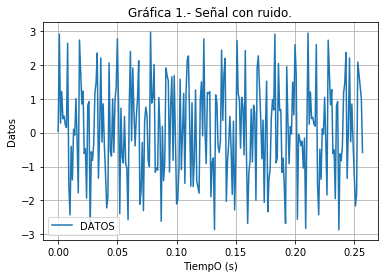

In [7]:
#Graficamos los datos
ax = plt.gca()

df1.plot(kind='line',x='TIEMPO',y='DATOS',ax=ax)


plt.xlabel("TiempO (s)")   
plt.ylabel("Datos")  
plt.grid()

plt.title('Gráfica 1.- Señal con ruido.')
plt.savefig('Gráfica 1',plt=2000)
plt.show()


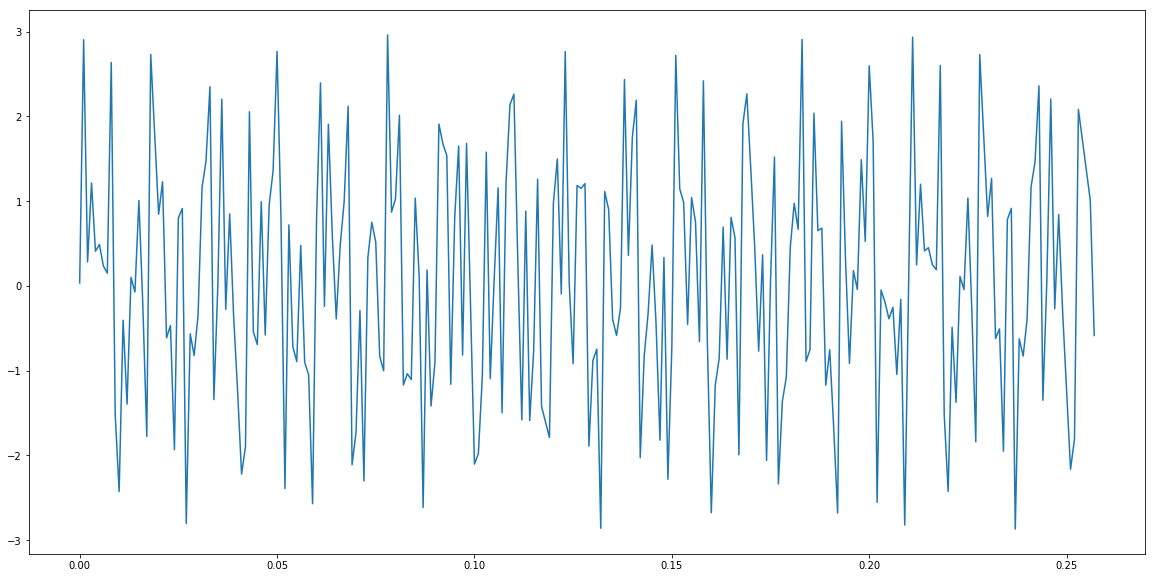

In [8]:
plt.figure(figsize=(20,10))

plt.plot(df1["TIEMPO"],df1["DATOS"])

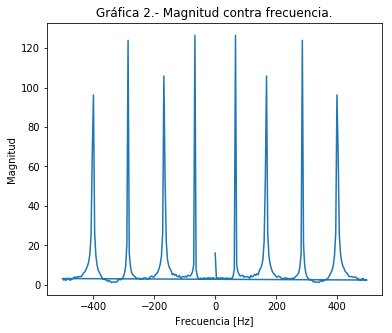

In [9]:
#Aplicamos FFT a los datos

#Establecemos nuestro ancho de paso como un microsegundo 
time_step=0.001

#Calculamos la FFT de los datos de la señal 
sig_fft = fftpack.fft(DATOS)

# Tomamos su valor absoluto
mag_fft = np.abs(sig_fft)

# Calculamos las frecuencias correspondientes
sample_freq = fftpack.fftfreq(Num, d=time_step)

# Graficamos la magnitud contra la frecuencia 
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, mag_fft)

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')

plt.title('Gráfica 2.- Magnitud contra frecuencia.')
plt.savefig('Gráfica 2',plt=2000)
plt.show()

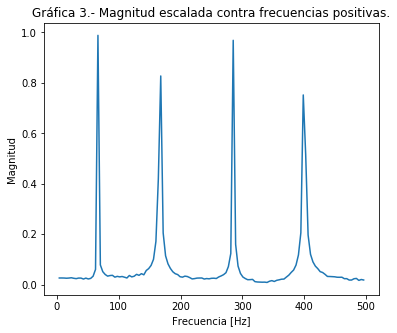

In [10]:
#Identificamos frecuencias a partir del cero
positive_freq = sample_freq >0 

# Escalamos la gráfica
esc_fft=2*mag_fft/Num

# Hacemos la gráfica escalada
plt.figure(figsize=(6, 5))
plt.plot(sample_freq[positive_freq], esc_fft[positive_freq])

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')

plt.title('Gráfica 3.- Magnitud escalada contra frecuencias positivas.')
plt.savefig('Gráfica 3',plt=2000)
plt.show()

In [11]:
#Agregamos las frecuencias y las magnitudes encontradas como columnas del dataframe 
df1["FRECUENCIAS"]= sample_freq
df1["MAGNITUD_ESC"]= esc_fft

df1.head()

,TIEMPO,DATOS,FRECUENCIAS,MAGNITUD_ESC
0,0.000,0.034281,0.00000,0.125494
1,0.001,2.903810,3.90625,0.026739
2,0.002,0.281685,7.81250,0.026823
3,0.003,1.213575,11.71875,0.026582
4,0.004,0.409638,15.62500,0.025826


In [12]:
#Ubicamos nuestras frecuencias en el dataframe
df2 = df1[df1["MAGNITUD_ESC"]>0.6]
df3 = df2[df2["FRECUENCIAS"]>0]

df3

,TIEMPO,DATOS,FRECUENCIAS,MAGNITUD_ESC
17,0.017,-1.776009,66.40625,0.988599
43,0.043,2.054381,167.96875,0.827583
73,0.073,0.331726,285.15625,0.968928
102,0.102,-1.064654,398.43750,0.752370
